# Revenue Budget

### Data Cleaning

# Revenue Budget

### Data Cleaning

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
df_revenue = pd.read_csv("data/fy24-adopted-revenue-budget.csv")
df_revenue = df_revenue.dropna(axis=1)
null_res = pd.isnull(df_revenue)
df_revenue_non_dup = df_revenue.drop_duplicates()
money_cols = df_revenue.iloc[:,-4:].columns
df_revenue[money_cols] = df_revenue[money_cols].replace(regex=',', value='')
df_revenue[money_cols] = df_revenue[money_cols].apply(pd.to_numeric)

df_revenue

,Revenue Category,Account,Cabinet,Department,FY21 Actual,FY22 Actual,FY23 Appropriation,FY24 Adopted
0,Property Tax Levy,Real Estate Taxes,Finance,Assessing Department,2490082613,2630469593,2784133324,2913736657
1,Property Tax Levy,Personal Property Tax,Finance,Assessing Department,189939113,196499737,209010762,214236031
2,Property Tax Levy,Property Tax Overlay,Finance,Assessing Department,-3735387,-33174590,-29845007,-30000000
3,Excises,MV Excise - Current Year,Finance,Assessing Department,36012943,36227381,34000000,34000000
4,Excises,MV Excise - Prior Year,Finance,Assessing Department,15202795,21692077,17500000,18000000
...,...,...,...,...,...,...,...,...
194,Available Funds,Approp. Cemetery Trust Fund,"Environment, Energy & Open Space",Parks & Recreation Department,0,0,950000,950000
195,Available Funds,Approp. Parking Meters,Streets,Transportation Department,20000000,0,30000000,30000000
196,Non-Recurring Revenue,American Rescue Plan,Finance,Auditing Department,0,55000000,40000000,0
197,Non-Recurring Revenue,Approp. Fund Balance,Finance,Auditing Department,40000000,0,40000000,40000000


### Fiscal Years Sum Line Graph

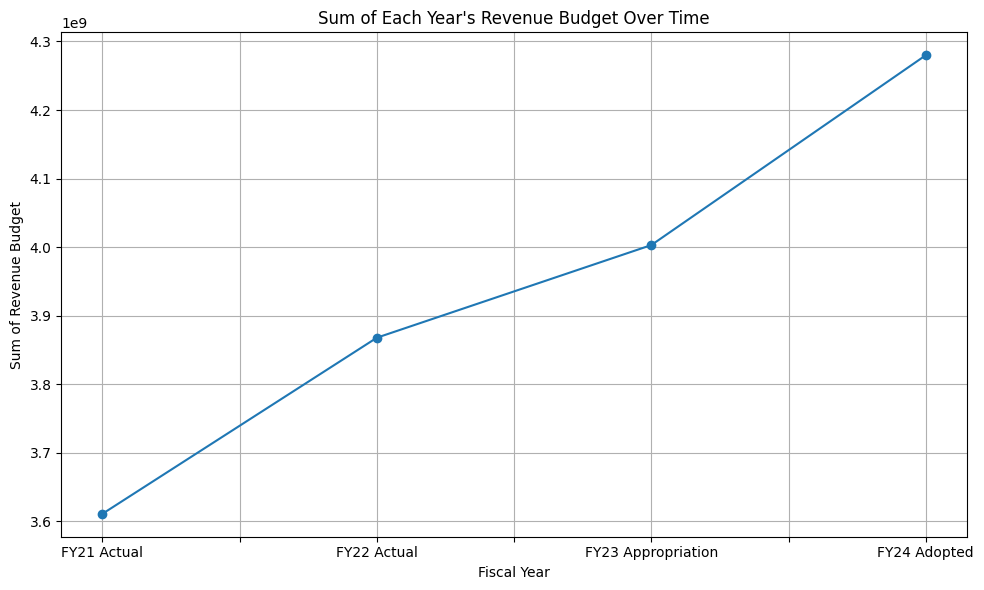

In [24]:
def plot_fiscal_year_sums(data, columns):
    # Summing up the values for each fiscal year
    sums = data[columns].sum()

    # Plotting the data
    plt.figure(figsize=(10, 6))
    sums.plot(kind='line', marker='o')
    plt.title('Sum of Each Year\'s Revenue Budget Over Time')
    plt.ylabel('Sum of Revenue Budget')
    plt.xlabel('Fiscal Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_fiscal_year_sums(df_revenue, ['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted'])


### Revenue Category and Cabinet Grouped Bar Graph

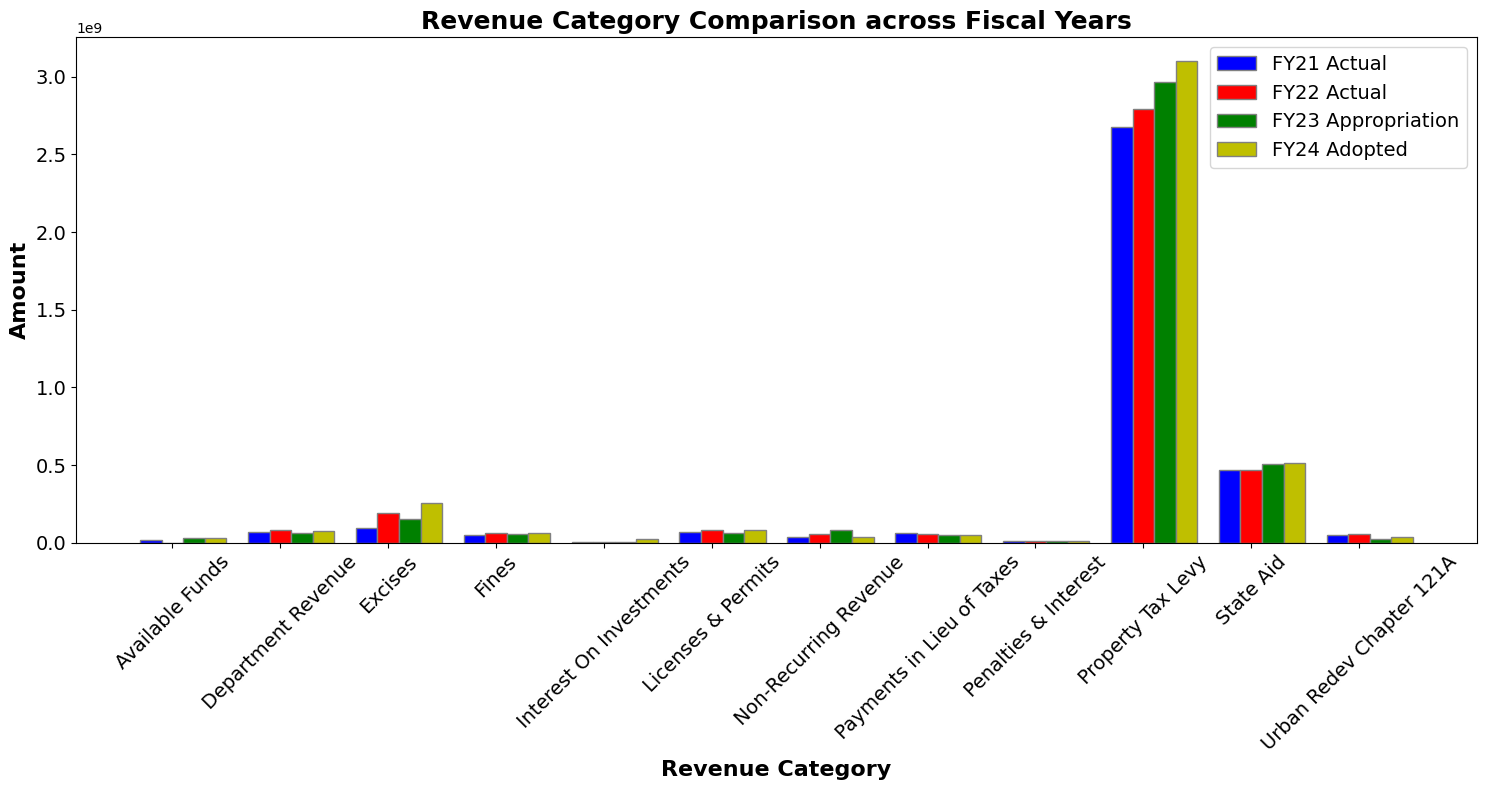

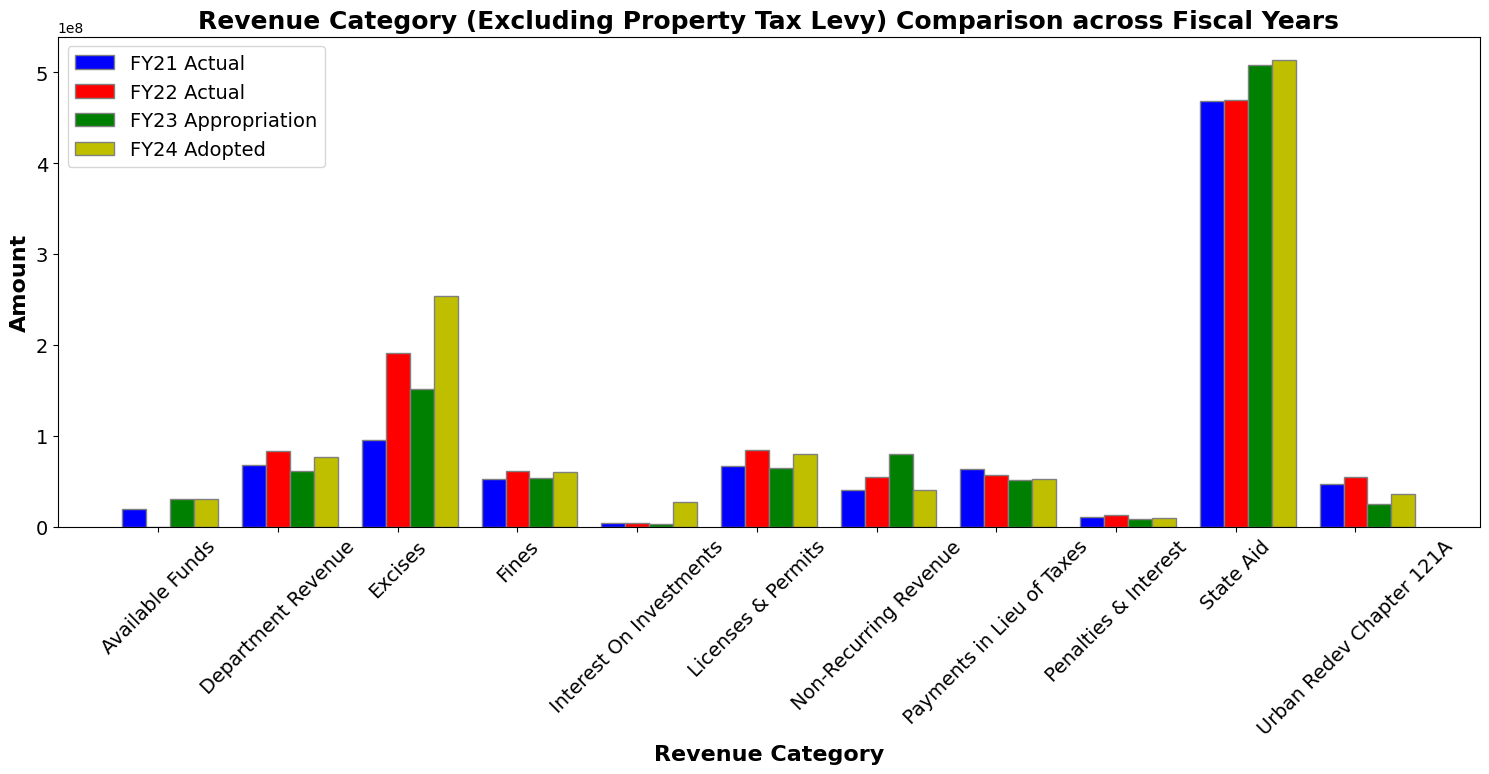

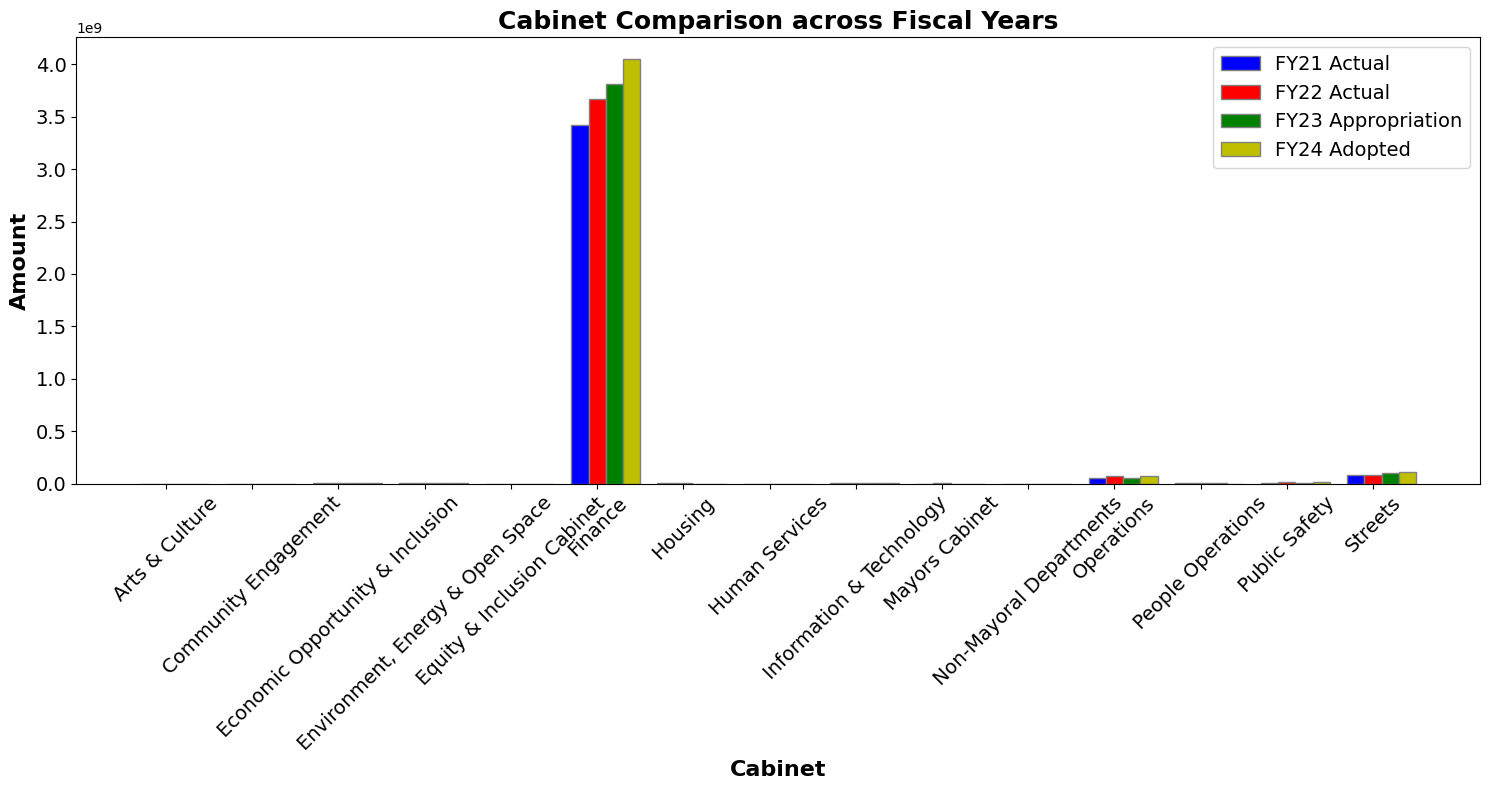

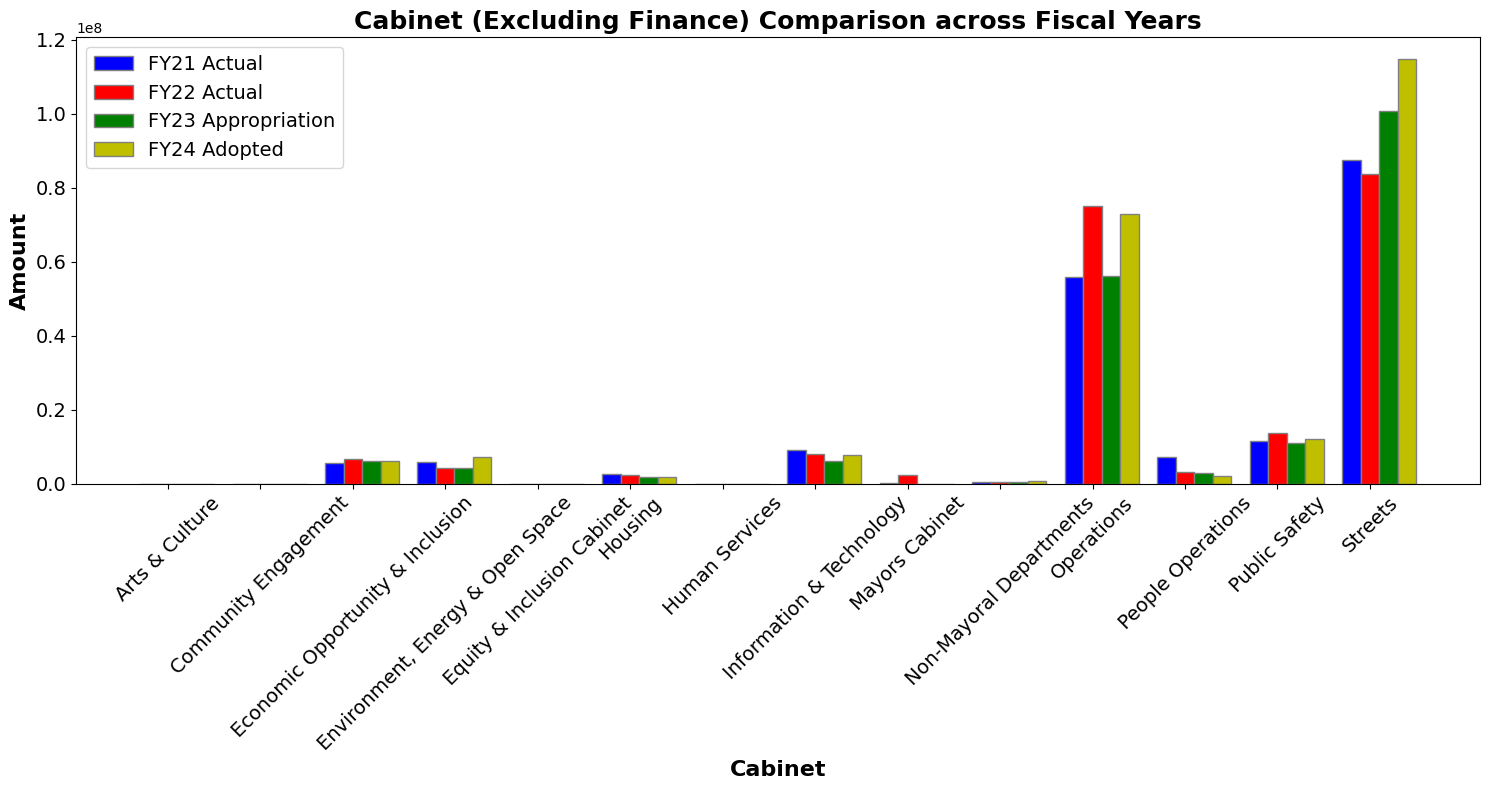

In [25]:
def plot_grouped_bar(data, group_col, exclude_category=None, title_prefix='', xlabel='', ylabel='Amount'):
    fiscal_years = ['FY21 Actual', 'FY22 Actual', 'FY23 Appropriation', 'FY24 Adopted']
    # Group the data and sum up the values for each fiscal year
    grouped_data = data.groupby(group_col).agg({year: 'sum' for year in fiscal_years}).reset_index()

    # Filter out the specified category, if provided
    if exclude_category is not None:
        grouped_data = grouped_data[grouped_data[group_col] != exclude_category]
        title_prefix += f" (Excluding {exclude_category})"

    # Plotting
    barWidth = 0.2
    r = [range(len(grouped_data))]
    for i, year in enumerate(fiscal_years):
        r.append([x + barWidth for x in r[-1]])

    plt.figure(figsize=(15, 8))
    colors = ['b', 'r', 'g', 'y']  
    for idx, (year, color) in enumerate(zip(fiscal_years, colors)):
        plt.bar(r[idx], grouped_data[year], color=color, width=barWidth, edgecolor='grey', label=year)

    # Title, Labels & Legend
    plt.title(title_prefix + ' Comparison across Fiscal Years', fontweight='bold', fontsize=18)
    plt.xlabel(xlabel, fontweight='bold', fontsize=16)
    plt.ylabel(ylabel, fontweight='bold', fontsize=16)
    plt.xticks([r + barWidth for r in range(len(grouped_data))], grouped_data[group_col], rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)

    # Display the plot
    plt.tight_layout()
    plt.show()

plot_grouped_bar(df_revenue, 'Revenue Category', title_prefix='Revenue Category', xlabel='Revenue Category')
plot_grouped_bar(df_revenue, 'Revenue Category', exclude_category='Property Tax Levy', title_prefix='Revenue Category', xlabel='Revenue Category') # without 'Property Tax Levy'
plot_grouped_bar(df_revenue, 'Cabinet', title_prefix='Cabinet', xlabel='Cabinet')
plot_grouped_bar(df_revenue, 'Cabinet', exclude_category='Finance', title_prefix='Cabinet', xlabel='Cabinet') # without 'Finance'

# Operating Budget

### Data Cleaning

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df_operating = pd.read_csv('data/fy24-adopted-operating-budget.csv')
df_operating.columns = ['Cabinet', 'Dept', 'Program', 'ExpenseCategory', 'FY21ActualExpense','FY22ActualExpense', 'FY23Appropriation', 'FY24Adopted']

df_operating = df_operating.applymap(lambda x: x.strip())
df_operating['FY21ActualExpense'] = df_operating['FY21ActualExpense'].replace('#Missing', np.nan)
df_operating['FY22ActualExpense'] = df_operating['FY22ActualExpense'].replace('#Missing', np.nan)
df_operating['FY23Appropriation'] = df_operating['FY23Appropriation'].replace('#Missing', np.nan)
df_operating['FY24Adopted'] = df_operating['FY24Adopted'].replace('#Missing', np.nan)
df_operating['FY21ActualExpense'] = df_operating['FY21ActualExpense'].replace(',', np.nan, regex=True)
df_operating['FY22ActualExpense'] = df_operating['FY22ActualExpense'].replace(',', np.nan, regex=True)
df_operating['FY23Appropriation'] = df_operating['FY23Appropriation'].replace(',', np.nan, regex=True)
df_operating['FY24Adopted'] = df_operating['FY24Adopted'].replace(',', np.nan, regex=True)
df_operating['FY21ActualExpense'] = df_operating['FY21ActualExpense'].astype(float)
df_operating['FY22ActualExpense'] = df_operating['FY22ActualExpense'].astype(float)
df_operating['FY23Appropriation'] = df_operating['FY23Appropriation'].astype(float)
df_operating['FY24Adopted'] = df_operating['FY24Adopted'].astype(float)
df_operating = df_operating.dropna()

df_operating

/var/folders/kq/zy3gsq3d4y11t8kwl308dffh0000gn/T/ipykernel_81852/2855817570.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_operating = df_operating.applymap(lambda x: x.strip())


,Cabinet,Dept,Program,ExpenseCategory,FY21ActualExpense,FY22ActualExpense,FY23Appropriation,FY24Adopted
0,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Personnel Services,1820538.46,1624903.69,1.584054e+06,1921403.81
1,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Contractual Services,127557.82,284597.90,9.931400e+04,219633.42
2,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Supplies & Materials,27318.17,28541.55,4.493800e+04,55573.65
3,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Current Charges & Obligations,11365.77,19410.30,2.963000e+04,16734.29
4,Mayor's Cabinet,Mayor's Office,Mayor's Administration,Equipment,39040.60,16164.36,2.490000e+04,36115.00
...,...,...,...,...,...,...,...,...
894,Other,Annual Audit Costs,Annual Audit Costs,Other Expenses,142850.00,708203.00,7.500000e+05,750000.00
895,Other,Housing Trust Fund,Housing Trust Fund,Other Expenses,576195.84,525404.86,6.180000e+05,618000.00
896,Other,Reserve for Collective Bargaining City,Reserve for Collective Bargaining City,Personnel Services,14000000.00,52000000.00,3.618594e+07,76212679.00
897,Other,OPEB,OPEB,Other Expenses,40000000.00,40000000.00,4.000000e+07,40000000.00


### Fiscal Year Sum Line Graph

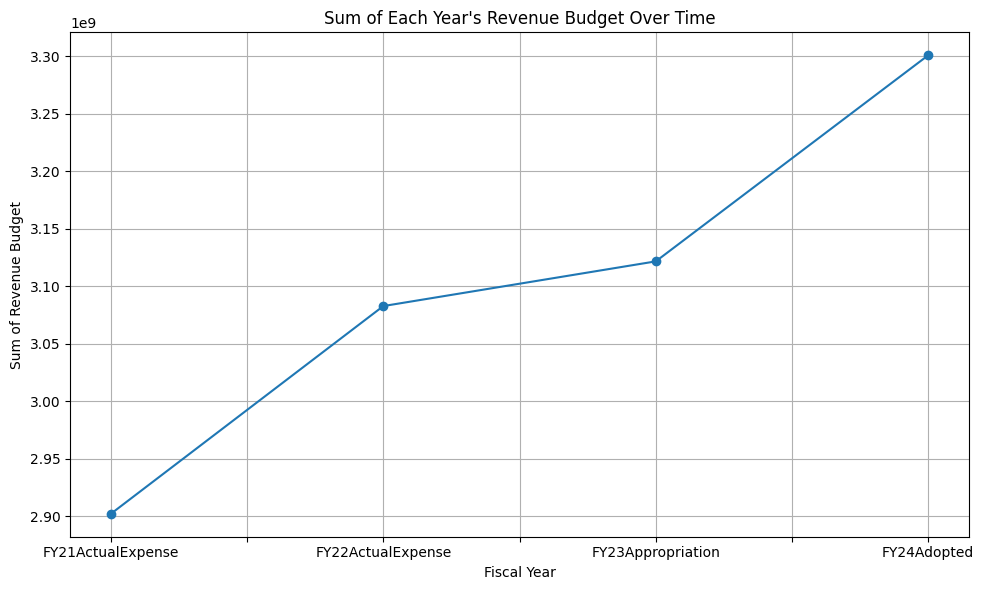

In [27]:
plot_fiscal_year_sums(df_operating, ['FY21ActualExpense', 'FY22ActualExpense', 'FY23Appropriation', 'FY24Adopted'])

### Cabinet Pie Chart 

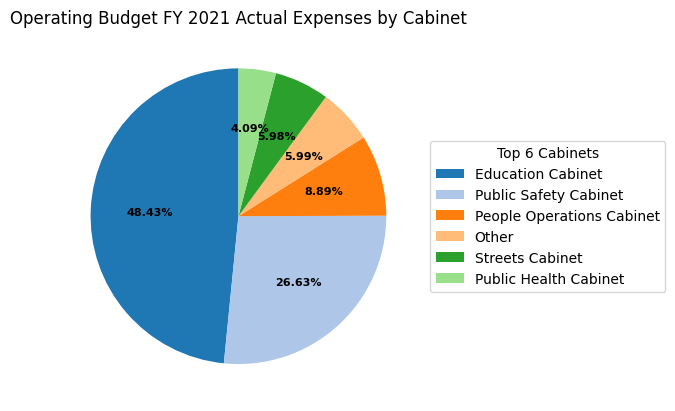

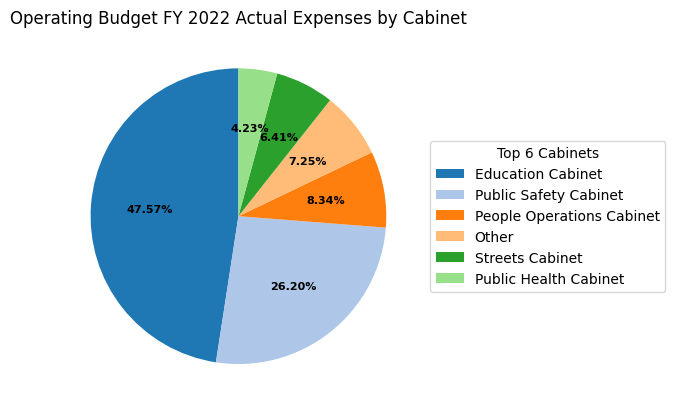

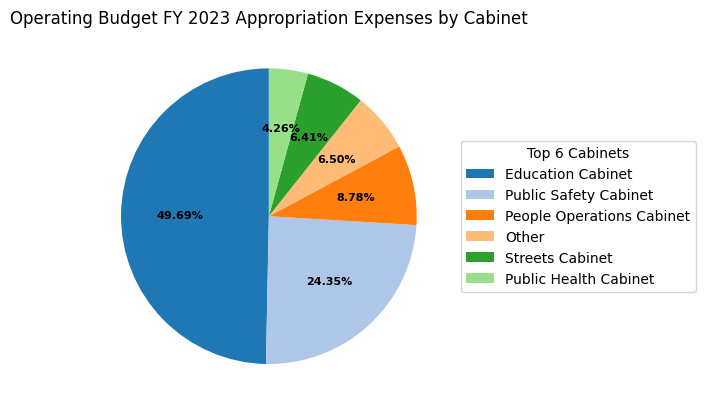

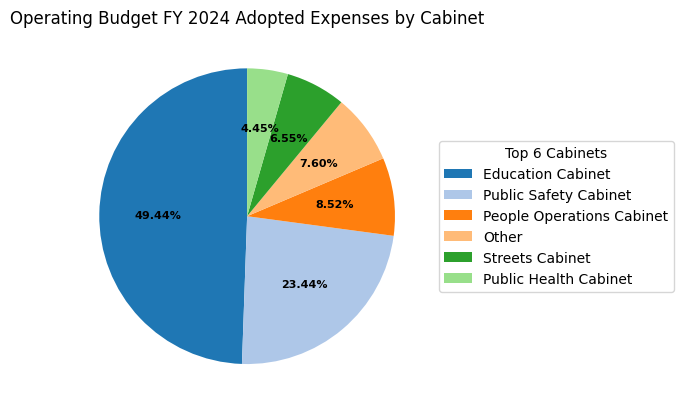

In [28]:
def plot_expenses_pie_chart(df_operating, year_col, title='', top_x=None):
    # Group by 'Cabinet' and sum the expenses for the given year
    expenses_by_cabinet = df_operating.groupby('Cabinet')[year_col].sum().sort_values(ascending=False)

    if top_x is not None:
        # If top_x is provided, select only the top x categories
        expenses_by_cabinet = expenses_by_cabinet.head(top_x)

    # Prepare data
    labels = expenses_by_cabinet.index
    sizes = expenses_by_cabinet.values

    # Function to format the percentage labels on the pie chart
    def make_autopct(values):
        def my_autopct(pct):
            return '{p:.2f}%'.format(p=pct)
        return my_autopct

    # Define a color palette
    colors = plt.cm.tab20.colors[:top_x] if top_x else plt.cm.tab20.colors

    # Create the pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct=make_autopct(sizes), colors=colors, startangle=90)

    # Make the percentage labels a little bigger
    plt.setp(autotexts, size=8, weight="bold", color="black")

    # Add a legend for the top x categories to the right of the plot
    if top_x:
        ax.legend(wedges, labels, title="Top {} Cabinets".format(top_x), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Set the title for the pie chart
    ax.set_title(title if title else f'Expenses by Cabinet for {year_col}')

    # Adjust the plot size to make room for the legend
    plt.subplots_adjust(right=0.85)

    # Show the plot
    plt.show()


plot_expenses_pie_chart(df_operating, 'FY21ActualExpense', title='Operating Budget FY 2021 Actual Expenses by Cabinet', top_x=6)
plot_expenses_pie_chart(df_operating, 'FY22ActualExpense', title='Operating Budget FY 2022 Actual Expenses by Cabinet', top_x=6)
plot_expenses_pie_chart(df_operating, 'FY23Appropriation', title='Operating Budget FY 2023 Appropriation Expenses by Cabinet', top_x=6)
plot_expenses_pie_chart(df_operating, 'FY24Adopted', title='Operating Budget FY 2024 Adopted Expenses by Cabinet', top_x=6)


# Capital Budget

### Data Cleaning

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df_capital = pd.read_csv("data/fy24-capital-budget-plan-recommended.csv")
df_capital = df_capital.drop_duplicates()
df_capital = df_capital.drop_duplicates()
df_capital.fillna(0, inplace=True)
df_capital['Total_Project_Budget'] = pd.to_numeric(df_capital['Total_Project_Budget'], errors='coerce')
# Handling any new missing values after conversion
df_capital['Total_Project_Budget'].fillna(df_capital['Total_Project_Budget'].median(), inplace=True)

le = LabelEncoder()
df_capital['Scope_Of_Work'] = df_capital['Scope_Of_Work'].str.lower().str.replace('[^\w\s]', '')


df_capital = df_capital.drop_duplicates()
df_capital.fillna(0, inplace=True)

grouped = df_capital.groupby('Department').agg({
    ' CapitalYear_1 ': 'sum',
    'Capital_Year_25': 'sum',
    'Total_Project_Budget': 'sum'
}).sort_values(by='Total_Project_Budget', ascending=False)

df_capital

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Authorization_Existing,Authorization_FY,Authorization_Future,Grant_Existing,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
0,Boston Centers for Youth and Families,BCYF Security and Technology Upgrades,improvements to technology infrastructure and ...,Boston Centers for Youth and Families,To Be Scheduled,Citywide,750000,1250000,0,0,...,0,0,100000,1900000,0,0,0,0,0,2000000.0
1,Boston Centers for Youth and Families,BCYF Tobin Community Center Retaining Wall,repair or replace the retaining wall adjacent ...,Public Facilities Department,In Design,Mission Hill,1800000,0,0,0,...,0,100000,1500000,200000,0,0,0,0,0,1800000.0
2,Boston Centers for Youth and Families,BCYF North End Community Center,develop a design for a new north end community...,Public Facilities Department,In Design,North End,5000000,63000000,0,0,...,0,400000,3000000,64600000,0,0,0,0,20000000,88000000.0
3,Boston Centers for Youth and Families,Pool Repairs,renovate and upgrade locker rooms and pools in...,Boston Centers for Youth and Families,Annual Program,Citywide,1300000,1000000,0,0,...,383450,450000,700000,766550,0,0,0,0,0,2300000.0
4,Boston Centers for Youth and Families,Youth Budget Round 4,engage youth across the city to create a capit...,Youth Engagement and Employment,Implementation Underway,Citywide,1000000,0,0,0,...,17140,25000,250000,707860,0,0,0,0,0,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Transportation Department,Reconnecting Communities,conduct a feasibility study and initial design...,Boston Transportation Department,New Project,Chinatown,0,600000,0,0,...,0,0,200000,400000,0,0,300000,1500000,0,2400000.0
429,Property Management Department,Strand Theater,study to assess capital needs at the strand th...,Public Facilities Department,To Be Scheduled,Dorchester,250000,0,0,0,...,0,0,100000,150000,0,0,0,0,0,250000.0
430,Public Health Commission,Hyde Park Health Center Study,programing and siting study for a hyde park ar...,Public Facilities Department,To Be Scheduled,Hyde Park,0,0,2000000,0,...,0,0,0,2000000,0,0,0,0,0,2000000.0
431,Boston Public Schools,HVAC Repairs at Various Schools,hvac repairs and upgrades at various schools.,Boston Public Schools,New Project,Citywide,0,10000000,0,0,...,0,0,5000000,5000000,0,0,0,0,0,10000000.0


### Project Status Pie Chart

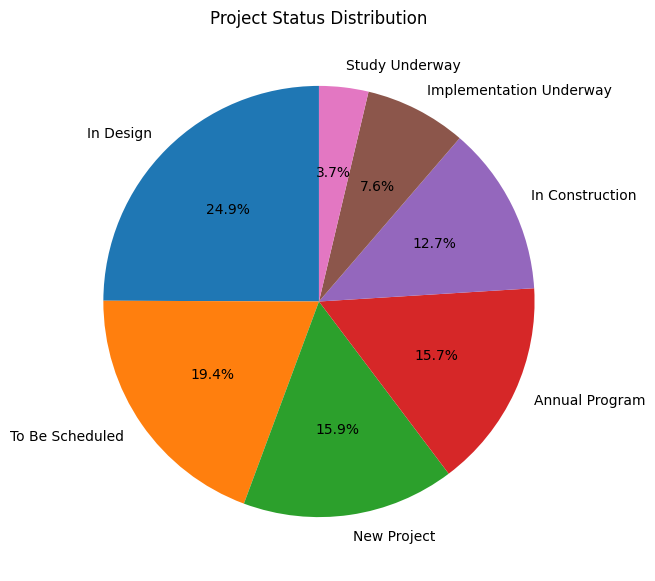

In [30]:
def plot_project_status_distribution(df_capital):
    project_status_counts = df_capital['Project_Status'].value_counts()
    project_status_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(10, 7))
    plt.title("Project Status Distribution")
    plt.ylabel('')  # to remove the default 'Project_Status' label
    plt.show()


plot_project_status_distribution(df_capital)


### Spending by Department and Budget Allocation by Department

/var/folders/kq/zy3gsq3d4y11t8kwl308dffh0000gn/T/ipykernel_81852/2684968907.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=department_spending.index, x=department_spending.values, palette="viridis")


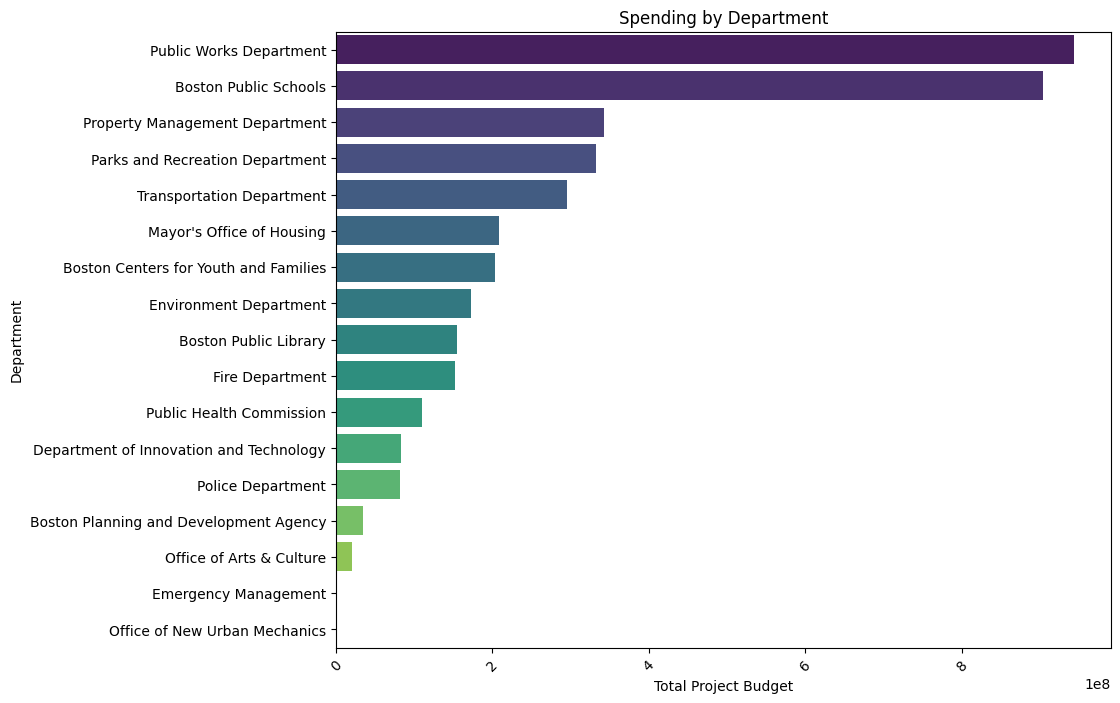

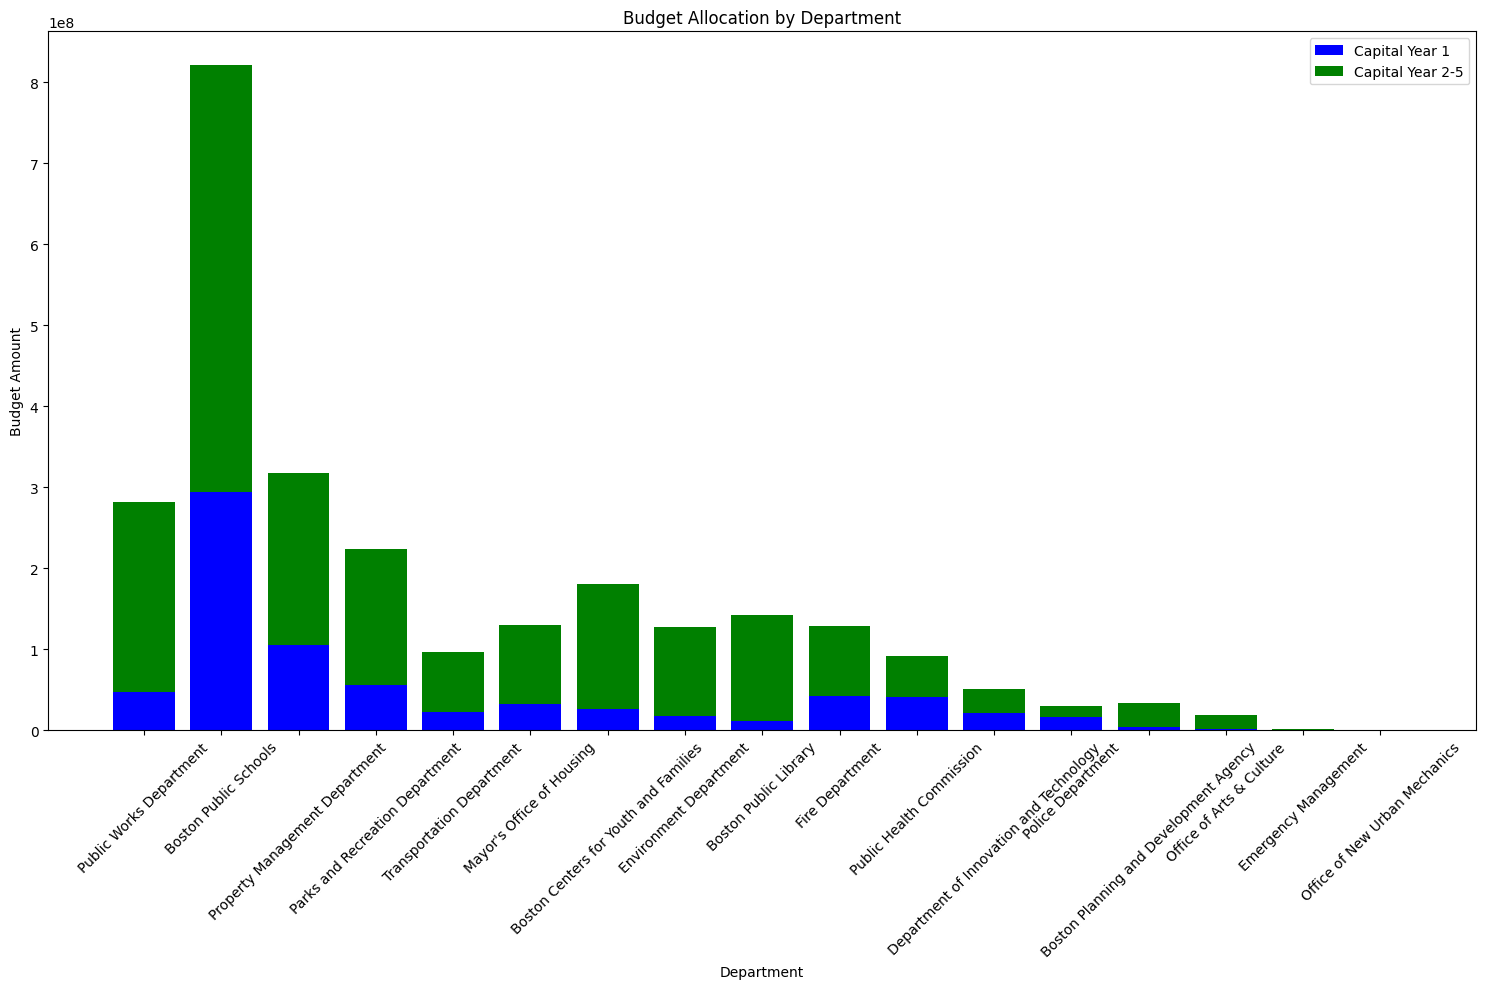

In [31]:
import seaborn as sns

def plot_budget_allocation_by_department(grouped):
    plt.figure(figsize=(15, 10))
    plt.bar(grouped.index, grouped[' CapitalYear_1 '], label='Capital Year 1', color='blue')
    plt.bar(grouped.index, grouped['Capital_Year_25'], bottom=grouped[' CapitalYear_1 '], label='Capital Year 2-5', color='green')
    plt.ylabel('Budget Amount')
    plt.xlabel('Department')
    plt.title('Budget Allocation by Department')
    plt.xticks(rotation=45)  # Rotate department names for better visibility
    plt.legend()
    plt.tight_layout()
    plt.show()

def visualize_department_spending(df_capital):
    # Aggregate total project budgets by department and sort
    department_spending = df_capital.groupby('Department')['Total_Project_Budget'].sum().sort_values(ascending=False)

    # Create a bar plot for Spending by Department
    plt.figure(figsize=(10, 8))
    sns.barplot(y=department_spending.index, x=department_spending.values, palette="viridis")
    plt.title('Spending by Department')
    plt.xlabel('Total Project Budget')
    plt.ylabel('Department')
    plt.xticks(rotation=45)
    plt.show()


visualize_department_spending(df_capital)
plot_budget_allocation_by_department(grouped)

### Project Allocation by Neighborhood

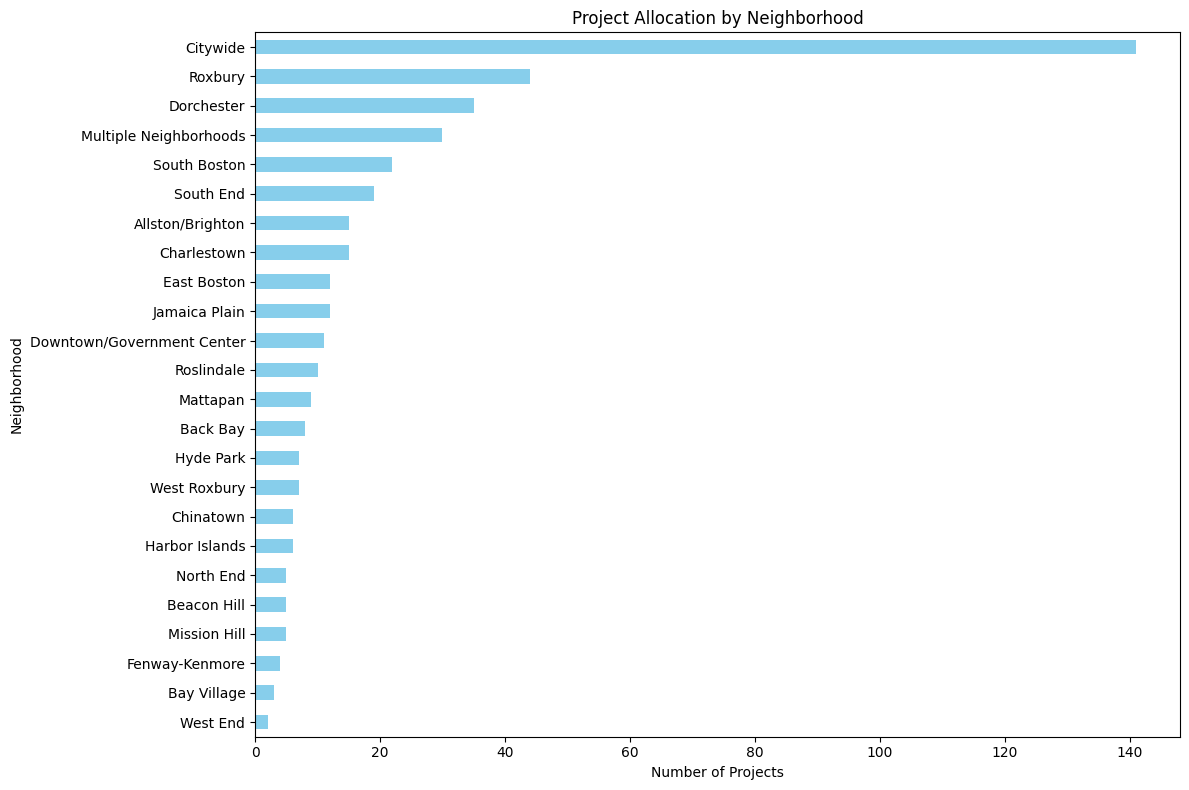

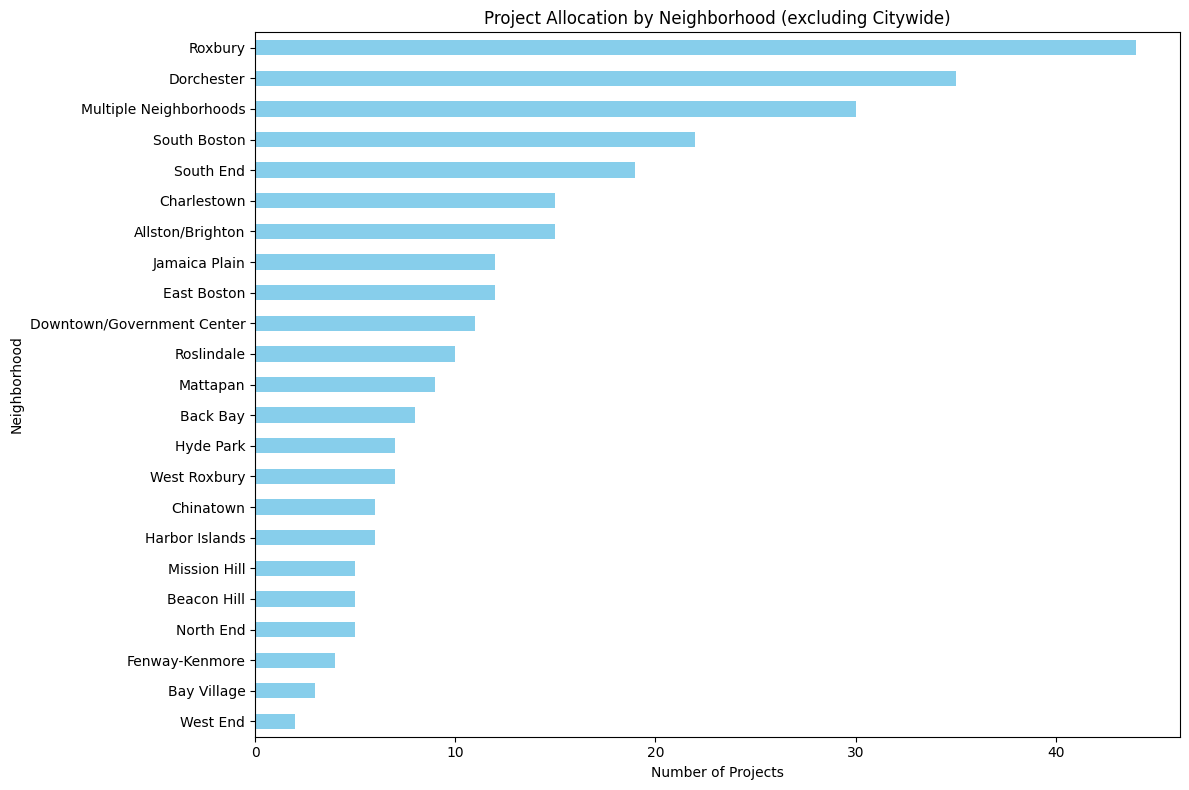

In [32]:
def plot_project_allocation_by_neighborhood(df, exclude_neighborhood=None):
    # Aggregate by Neighborhood
    if exclude_neighborhood:
        df = df[df['Neighborhood'] != exclude_neighborhood]
    neighborhood_counts = df['Neighborhood'].value_counts().sort_values(ascending=True)

    # Plotting the data
    plt.figure(figsize=(12, 8))
    neighborhood_counts.plot(kind='barh', color='skyblue')
    plt.xlabel('Number of Projects')
    plt.ylabel('Neighborhood')
    plt.title('Project Allocation by Neighborhood' + (f" (excluding {exclude_neighborhood})" if exclude_neighborhood else ''))
    plt.tight_layout()
    plt.show()

plot_project_allocation_by_neighborhood(df_capital)
plot_project_allocation_by_neighborhood(df_capital, 'Citywide')

/var/folders/kq/zy3gsq3d4y11t8kwl308dffh0000gn/T/ipykernel_81852/675655307.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_spending.index, x=category_spending.values, palette="muted")


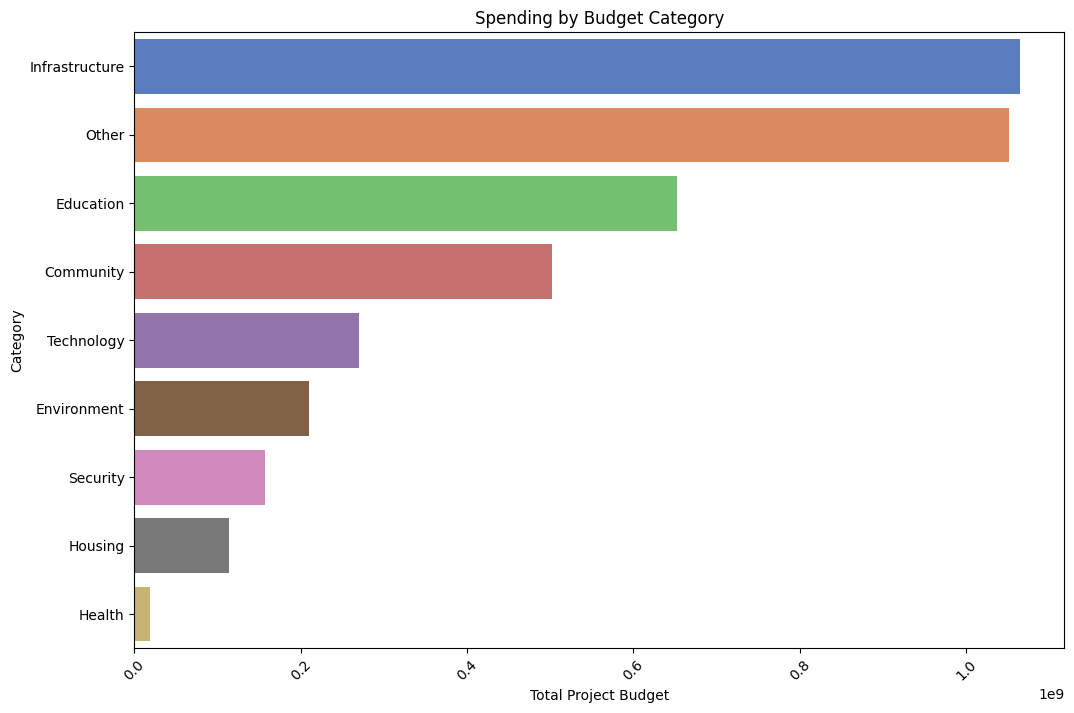

In [33]:
keywords = {
    'Infrastructure': ['infrastructure', 'road', 'bridge', 'transport', 'utility'],
    'Technology': ['technology', 'IT', 'system', 'software'],
    'Community': ['community', 'recreation', 'park', 'public space'],
    'Education': ['school', 'education', 'learning', 'classroom'],
    'Health': ['health', 'medical', 'hospital', 'clinic'],
    'Security': ['security', 'safety', 'police', 'fire'],
    'Environment': ['environment', 'climate', 'energy', 'green'],
    'Housing': ['housing', 'residence', 'home', 'accommodation']
}

def plot_spending_by_budget_category(df, keywords):
    # Function to categorize based on keywords
    def categorize(text, keywords):
        for category, keys in keywords.items():
            if any(key in text.lower() for key in keys):
                return category
        return 'Other'
    
    # Applying categorization
    df['Category'] = df['Scope_Of_Work'].apply(lambda x: categorize(x, keywords) if isinstance(x, str) else 'Other')
    
    # Aggregating budget by inferred category
    category_spending = df.groupby('Category')['Total_Project_Budget'].sum().sort_values(ascending=False)
    
    # Creating a bar plot for Spending by Budget Category
    plt.figure(figsize=(12, 8))
    sns.barplot(y=category_spending.index, x=category_spending.values, palette="muted")
    plt.title('Spending by Budget Category')
    plt.xlabel('Total Project Budget')
    plt.ylabel('Category')
    plt.xticks(rotation=45)
    plt.show()

plot_spending_by_budget_category(df_capital, keywords)
